<a href="https://colab.research.google.com/github/alex-jk/SWB-GVCEH/blob/main/models/relevance_model/Relevance_Model_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import os

In [3]:
# Base URL for raw content in the GitHub repository
base_url = 'https://raw.githubusercontent.com/alex-jk/SWB-GVCEH/main/models/relevance_model/'

# Correctly encode the file names by replacing spaces with '%20'
csv_file1 = 'GVCEH%20Milestone%202%20Labelling%201%20-%20RawData.csv'
csv_file2 = 'GVCEH%20Milestone%202%20Labelling%202%20-%20RawData.csv'

# Read the CSV files from GitHub
df1 = pd.read_csv(base_url + csv_file1, usecols=['text', 'Relevant to Victoria', 'Relevant to Homelessness'])
df2 = pd.read_csv(base_url + csv_file2, usecols=['text', 'Relevant to Victoria', 'Relevant to Homelessness'])

# Rename columns for convenience
df1 = df1.rename(columns={"Relevant to Victoria": "vic", "Relevant to Homelessness": "hl"})
df2 = df2.rename(columns={"Relevant to Victoria": "vic", "Relevant to Homelessness": "hl"})

# Display the first few rows of the DataFrame
print(df1.columns)
print(df1.head())

Index(['vic', 'hl', 'text'], dtype='object')
   vic  hl                                               text
0  Yes  No  @AnnaGreenwoodL1 @saanich Dawson Heights Housi...
1   No  No  It's Election Day and the polls are now open u...
2   No  No  Sidney Bulwer Michaelia Roger #彩票 Bblythe Camp...
3   No  No  Me telling my parents I’m gonna spit on this o...
4   No  No  WRD Director Joy Langford shared water conserv...


In [4]:
from transformers import AutoModel

# Load the model
model = AutoModel.from_pretrained("sheilaflood/gvceh-setfit-rel-model2")

# Check the configuration of the model
config = model.config

# Check the state dictionary (weights) of the model
state_dict = model.state_dict()

config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [5]:
# Print the configuration of the model
print(model.config)

# For example, to print the weights of the first transformer layer
print(state_dict['encoder.layer.0.attention.self.query.weight'])

RobertaConfig {
  "_name_or_path": "sheilaflood/gvceh-setfit-rel-model2",
  "architectures": [
    "RobertaModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

tensor([[ 0.0748, -0.0012, -0.0722,  ...,  0.1540,  0.0737, -0.1073],
        [-0.0733,  0.2006,  0.1053,  ...,  0.0542,  0.0490,  0.1169],
        [ 0.1180,  0.0596, -0.0387,  ..., -0.0220, -0.0336,  0.1252],
        ...,
        [-0.1779,  0.0062, -0.0507,  .

In [6]:
base_url = 'https://raw.githubusercontent.com/alex-jk/SWB-GVCEH/main/data/processed/twitter/github_actions/'
csv_file1 = 'GVCEH-tweets-combined_2022-04-03.csv'
df1 = pd.read_csv(base_url + csv_file1)

print(df1.columns)
print(df1.shape)
print(df1.head(15))

Index(['Unnamed: 0', 'text', 'scrape_time', 'tweet_id', 'created_at',
       'reply_count', 'quote_count', 'like_count', 'retweet_count',
       'geo_full_name', 'geo_id', 'username', 'num_followers',
       'search_keywords', 'search_neighbourhood', 'sentiment', 'score'],
      dtype='object')
(8885, 17)
    Unnamed: 0                                               text  \
0           23  @RogersCrispin @JinnealRobenko @Adam_Stirling ...   
1           24  @citizens_vicbc As opposed to only having mult...   
2           31  It's great to see Saanich Council taking actio...   
3           32  @spaze_cadet @CStrable @chrislhayes Because of...   
4           35  Ex-@BCLegislature Speaker Darryl Plecas reacts...   
5           37  @KristaLoughton @CityOfVictoria Do you think t...   
6           38  @GoVern2018 Hi Vernon. I assume you seen Victo...   
7           40  Saanich homeowners won't need council approval...   
8           45  RT @VicBuilders: @tim3048 @TristinHopper Same ...   
9  

In [7]:
print(df1.text[0])

@RogersCrispin @JinnealRobenko @Adam_Stirling @timescolonist Sure and not cancelling affordable housing projects in the 80’s, not inducing urban sprawl in Langford, and prioritizing smart urban density instead of doing Gordon Head all could have been better… but we have what we have and have to find a way forward given the circumstance.


In [8]:
!pip install setfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 797.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=5a5a1a4eadcd7861379b43f1f20b77aee4b2fd27c4c0d38b19ad4115f52c7cae
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [9]:
from setfit import SetFitModel

# Load the pretrained SetFit model
model = SetFitModel.from_pretrained("sheilaflood/gvceh-setfit-rel-model2")

# Example text data
texts = ["Example text relevant to homelessness in Victoria.", "Irrelevant text about other topics."]

# Model makes predictions
predictions = model(texts)
print(predictions)
# The predictions would be an array of binary labels, such as [1, 0]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/118 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

model_head.pkl:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

tensor([1, 0])


In [10]:
file_path = '/content/drive/My Drive/SWB-GVCEH/reddit_data_search_terms.csv'  # Update with the path to your CSV file in Google Drive
reddit_data_search_df = pd.read_csv(file_path)
print(reddit_data_search_df.shape)
print(reddit_data_search_df.columns)
print(reddit_data_search_df.head(20))

(152161, 6)
Index(['Subreddit', 'Title', 'Text', 'User ID', 'Comment', 'Search Term'], dtype='object')
   Subreddit                                              Title  \
0      Sooke                                   Camping in Sooke   
1      Sooke                                   Camping in Sooke   
2      Sooke                                   Camping in Sooke   
3      Sooke                                   Camping in Sooke   
4      Sooke  Sooke boy denied $19,000 per month drug for th...   
5      Sooke        Are power outages in Sooke a regular thing?   
6      Sooke        Are power outages in Sooke a regular thing?   
7      Sooke        Are power outages in Sooke a regular thing?   
8      Sooke        Are power outages in Sooke a regular thing?   
9      Sooke        Are power outages in Sooke a regular thing?   
10     Sooke  Help: What’s the best option for housing right...   
11     Sooke  Help: What’s the best option for housing right...   
12     Sooke  Help: What’s

In [11]:
# Combine 'Title' and 'Text'
reddit_data_search_df['TitleText'] = reddit_data_search_df['Title'] + ' ' + reddit_data_search_df['Text']

ind = 10
select_text = reddit_data_search_df['TitleText'][ind]
print(select_text)
print(model(select_text))

print(reddit_data_search_df['Comment'][ind])

Help: What’s the best option for housing right now for someone about to move from out of province to Sooke for a job? Looking for at least a two bedroom, preferably a house than a condo. Is it better to rent or buy? Or live somewhere else and commute?
tensor(1)
About the same options for those of us already living here. Nothing.


In [12]:
unique_title_text_df = (
    reddit_data_search_df.groupby(['Subreddit', 'User ID', 'TitleText'])['Search Term']
    .agg(lambda x: ', '.join(x.unique()))
    .reset_index()
)
print(unique_title_text_df.shape)

num_nan_titletext = unique_title_text_df['TitleText'].isna().sum()
print(f"Number of rows with NA TitleText: {num_nan_titletext}")

print(unique_title_text_df.head(10))

(3730, 4)
Number of rows with NA TitleText: 0
    Subreddit       User ID  \
0       Sooke       Pkard82   
1       Sooke  VanillaWrong   
2       Sooke      babetteq   
3       Sooke   redd_planet   
4       Sooke  scoobysmokes   
5  VictoriaBC  --citylights   
6  VictoriaBC   -Dumblejor-   
7  VictoriaBC       -mikew-   
8  VictoriaBC       -mikew-   
9  VictoriaBC        00Noir   

                                           TitleText  \
0  Are power outages in Sooke a regular thing? Gr...   
1  Camping in Sooke Hi, we’re planning on camping...   
2  Cockatoo escaped across from Saseenos. Please ...   
3  Help: What’s the best option for housing right...   
4  Are there sexual predator watchdog groups in S...   
5  Affordable Internet in Downtown Victoria A fri...   
6  Blade Runner 2049 in IMAX on Sept 20th - come ...   
7  Best Kim-chi in Victoria? Hey guys,\n\nI'm loo...   
8  Does anyone in Victoria want some stuff?  (com...   
9  Valentines Day 'at home' dinner options? Hi al...

In [13]:
# Filter the DataFrame to create two separate DataFrames
# One with rows where 'TitleText' is not NaN
df_with_text = unique_title_text_df[unique_title_text_df['TitleText'].notna()].reset_index(drop=True)

# One with rows where 'TitleText' is NaN
df_with_nan = unique_title_text_df[unique_title_text_df['TitleText'].isna()].reset_index(drop=True)

# Display the number of rows in each DataFrame
print(f"With text: {len(df_with_text)}, no text: {len(df_with_nan)}")

With text: 3730, no text: 0


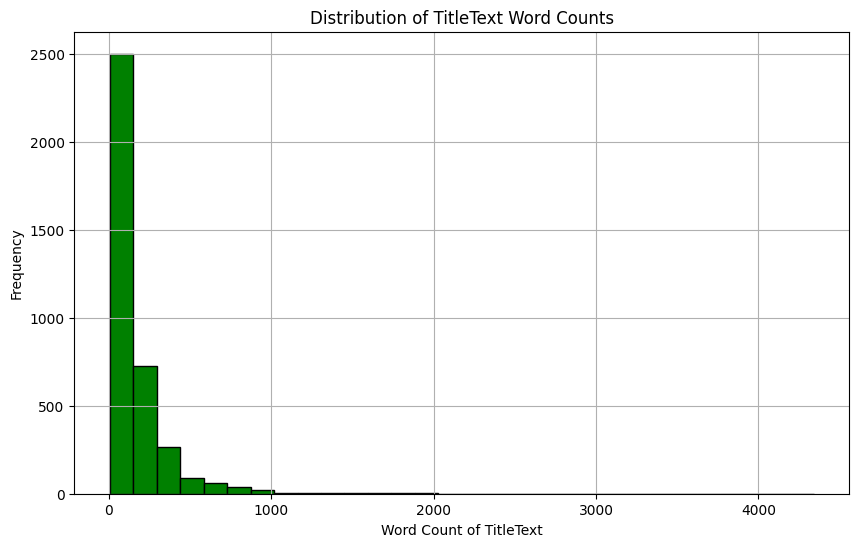

In [16]:
# Calculate the number of words in each TitleText
unique_title_text_df['WordCount'] = unique_title_text_df['TitleText'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(unique_title_text_df['WordCount'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of TitleText Word Counts')
plt.xlabel('Word Count of TitleText')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
ind = 19
print(df_with_text['Search Term'][ind])
print(model(df_with_text['TitleText'][ind]))
print(df_with_text['TitleText'][ind])

Low income, Low-income, Peer Housing Support, Peer Housing Support Program
tensor(1)
BC already has rent-control laws. Maybe it's time for property-tax-control laws too. (From TC: "Property tax idea from a B.C. senior") *[Article from the Times Colonist]*

**Comment: Property tax idea from a B.C. senior**

I am a low-income senior living on payments from the Canada Pension Plan and Old Age Security programs. Every year at this time, I must pay my biggest bill of all, my property taxes.

I live in a modest, older bungalow which matches my income and lifestyle.

After 33 years, my house assessment has dropped by half, but my lot assessment has leaped from $55,000 to $1.2 million even though the lot has not changed. In other words, almost all of the property tax I struggle to pay is due to speculative inflation.

Luckily I, like many of the current flood of retiring baby boomers, qualify for Property Tax Deferment.

Property tax deferment is available to B.C. homeowners who are 55 years o

In [48]:
# Function to apply the model to each row
def predict_relevance(text):
    # The model might expect a list of texts, adjust accordingly
    prediction = model([text])[0].numpy()
    return prediction

print(predict_relevance('Unfortunately the PTD is just a Band-Aid solution rather than part of any cure to the underlying problems.'))

1
